<a href="https://colab.research.google.com/github/DariaShcheglova/Creating_academic-presentation_AI_prompts/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D1%80_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F_CNN_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ИМПОРТ НЕОБХОДИМЫХ БИБЛИОТЕК

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# ЗАГРУЗКА ДАТАСЕТА (ДАННЫХ)

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


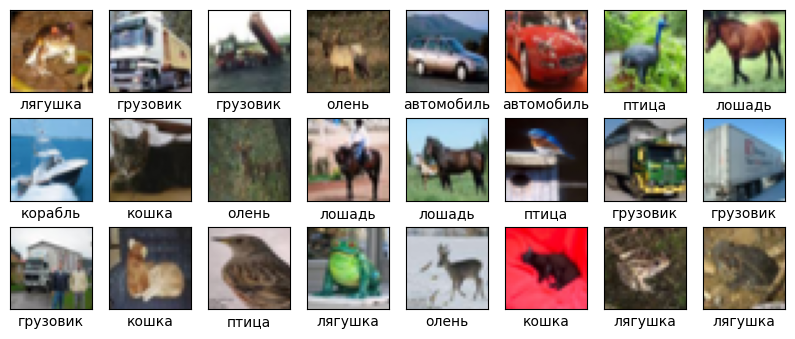

In [ ]:
class_names = ["самолет", "автомобиль", "птица", "кошка", "олень",
               "собака", "лягушка", "лошадь", "корабль", "грузовик"]

plt.figure(figsize=(10,4))
for i in range(24):
    plt.subplot(3,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])#рисуем картинку
    plt.xlabel(class_names[train_labels[i][0]]) #подписываем название
plt.show()

In [ ]:
# ОПИСАНИЕ АРХИТЕКТУРЫ

model = models.Sequential()

model.add(layers.Input(shape=(32,32,3)))

model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# КОМПИЛЯЦИЯ МОДЕЛИ (ПОДГОТОВКА К ОБУЧЕНИЮ)

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.summary() # информация о параметрах модели

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ОБУЧЕНИЕ МОДЕЛИ (fit) И ЗАПИСЬ РЕЗУЛЬТАТОВ ОБУЧЕНИЯ

history = model.fit(train_images, train_labels,
                      epochs=5,
                      batch_size=32,
                      validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 42ms/step - accuracy: 0.3817 - loss: 1.6986 - val_accuracy: 0.5645 - val_loss: 1.2208
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.5994 - loss: 1.1386 - val_accuracy: 0.6450 - val_loss: 1.0247
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.6641 - loss: 0.9698 - val_accuracy: 0.6560 - val_loss: 0.9918
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6970 - loss: 0.8805 - val_accuracy: 0.6779 - val_loss: 0.9409
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.7180 - loss: 0.8122 - val_accuracy: 0.6831 - val_loss: 0.9437


In [ ]:
y_pred = model.predict(test_images) # формируем предсказания (predict) модели на тестовом множестве

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


Ответ модели: это автомобиль


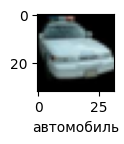

In [ ]:
# ПРОВЕРИМ ПРЕДСКАЗАНИЕ МОДЕЛИ НА СЛУЧАЙНОМ ИЗОБРАЖЕНИИ

k = np.random.randint(0, len(test_images)-1)
plt.figure(figsize=(1,1))
plt.imshow(test_images[k])
plt.xlabel(class_names[test_labels[k][0]])
print(f'Ответ модели: это {class_names[y_pred[k].argmax()]}')